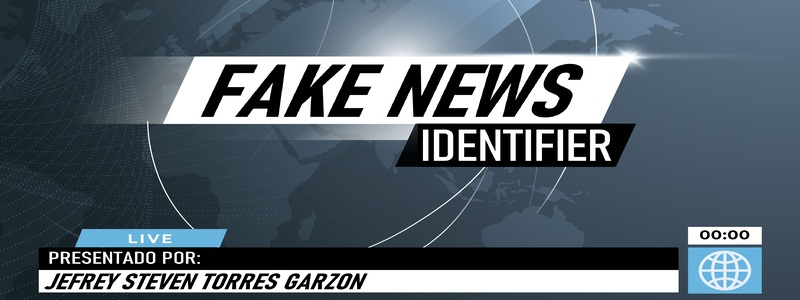

In [ ]:
Image("/content/drive/My Drive/Proyecto-IA/FakeNewsBanner.jpg")
#@markdown **BANNER**

# **Fake News Identifier**

In [ ]:
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell
from IPython.display import Image
import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

#@title **Load libs** { display-mode: "form" }
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set_theme()
pd.__version__

'1.3.5'

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Proyecto-IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proyecto-IA


*Este término es utilizado para
conceptualizar la divulgación de noticias falsas
que provocan un peligroso círculo de
desinformación...
Siempre han existido las noticias
engañosas, pero a partir de la emergencia de
Internet y de nuevas tecnologías de
comunicación e información, las Fake News han
proliferado a lo largo y ancho del planeta.*

**Tipos de FAKE NEWS**

1)Sátira o parodia: No pretende causar
daño o engaño.

2)Contenido engañoso: Se trata del uso
engañoso de la información para
incriminar a alguien o algo.

3)Contenido impostor: Es el tipo de
información que suplanta fuentes
genuinas.

4)Contenido fabricado: Contenido nuevo
que es predominantemente falso,
diseñado especialmente para engañar y
perjudicar.

5)Conexión falsa: Cuando los titulares,
imágenes o leyendas no confirman el
contenido.

6)Contexto falso: Cuando el contenido
genuino se difunde con información de
contexto falsa.

7)Contenido manipulado: Cuando
información o imágenes genuinas se
manipulan para engañar.

# ¿Por qué son un problema?

Las noticias falsas tienden a volverse virales entre el público. Con la presencia de plataformas de redes sociales como Twitter, es más fácil que la información falsa se difunda rápidamente. Las investigaciones han descubierto que la información política falsa tiende a difundirse «3 veces» más rápido que otras noticias falsas


 En Twitter, los tuits falsos tienen muchas más posibilidades de ser retuiteados que los verdaderos. Más aún, son los humanos los responsables de difundir noticias e información falsas en lugar de bots y granjas de clics. La tendencia de los humanos a difundir información falsa tiene que ver con el comportamiento humano. Según la investigación, los seres humanos se sienten atraídos por eventos e información que son sorprendentes y nuevos y, como resultado, provocan una gran excitación en el cerebro


# ¿Cómo funciona el código?

In [ ]:
Image("/content/drive/My Drive/Proyecto-IA/imageCode.jpg")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#@title **Cargar Dataset**
data = pd.read_csv("FAKESDataset.csv",encoding='unicode_escape')
data.head(10)

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
5,1914947536,Suicide bombing kills at least 16 in northeast...,Tue 05 Jul 2016 Suicide bombing kills at least...,nna,7/5/2016,hasakeh,0
6,1914947537,22 dead in heavy U.S. raids on IS Syria strong...,Sun 05 Jul 2015 22 dead in heavy U.S. raids on...,nna,7/5/2015,raqqa,0
7,1914947538,Suicide bomber kills 4 in Assad clans hometown,Sun 22 Feb 2015 Suicide bomber kills 4 in Assa...,nna,2/22/2015,lattakia,0
8,1914947539,Explosion rocks down town Damascus,Sun 01 Feb 2015 Explosion rocks down town Dama...,nna,2/1/2015,damascus,1
9,1914947540,Damascus explosion due to rocket bomb,Sat 24 Aug 2013 Damascus explosion due to rock...,nna,8/24/2013,damascus,0


**¿Qué contiene nuestro DataSet?**

Cada fila de dataSet está conformada por la información de una noticia, entre estas están su titulo, contenido, fecha, localización, lugar de donde fue extraido y un label que refiere a si dicha noticia es falsa(0) de este tipo de noticia tenemos en el dataset 368 y verdadera(1) de estas tenemos un total de 436.

**Letras a Números:**

Las máquinas, a diferencia de los humanos, no pueden entender el texto en bruto. Las máquinas solo pueden ver números. En particular, las técnicas estadísticas como el aprendizaje automático solo pueden tratar con números. Por lo tanto, necesitamos convertir nuestro texto en números.

El texto puede contener números, caracteres especiales y espacios no deseados. Dependiendo del problema al que nos enfrentemos, es posible que necesitemos o no eliminar estos caracteres especiales y números del texto. Sin embargo, en aras de la explicación, eliminaremos todos los caracteres especiales, números y espacios no deseados de nuestro texto.


In [ ]:
#@title **Estandarizando palabras**
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer


V = data['article_title']
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(V)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(V[sen]))
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
        
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)
print(documents)

['syria attack symptom consistent with nerve agent use who', 'homs governor say s attack caused death but doesnt see big human loss', 'death toll from aleppo bomb attack at least 112', 'aleppo bomb blast kill six syrian state tv', '29 syria rebel dead in fighting for key aleppo road', 'suicide bombing kill at least 16 in northeast syria', '22 dead in heavy s raid on is syria stronghold', 'suicide bomber kill 4 in assad clan hometown', 'explosion rock down town damascus', 'damascus explosion due to rocket bomb', 'syrian regime step up aerial assault on douma', 'hizballah lead regime offensive in southern syria', 'syrian opposition remains divided', 'is video show murder of 2 syrian activist', 'syria nusra front stage deadly suicide bombing in aleppo', 'regime troop thwart rebel attack in syria aleppo', 'ahrar al sham leader killed in syria', 'barrel bomb kill 11 in is town in syria', 'rebel advance in north western syria', 'israeli strike on syrian town kill pro regime fighter', 'syria 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


En el script anterior, usamos Regex Expressions de la biblioteca de Python para realizar diferentes tareas de preprocesamiento. 

Comenzamos eliminando todos los caracteres especiales, puesto que solo se tendrán en cuenta las palabras dentro del algoritmo.

Seguimos con todos los caracteres individuales que esten al principio de la oración que puedan provocar ruido y se sustituyen con un solo espacio.

Eliminamos los dobles espacios, cuando tiene un conjunto de datos en formato de bytes, la letra del alfabeto "b" se agrega antes de cada cadena para simplificar este espacio.

Se eliminan los prefijos, por ejemplo, cuando eliminamos el signo de puntuación de "David's" y lo reemplazamos con un espacio, obtenemos "David" y un solo carácter "s", que no tiene significado. 

El siguiente paso es convertir los datos a minúsculas para que las palabras que en realidad son las mismas pero tienen casos diferentes puedan tratarse por igual.

El último paso de preprocesamiento es la lematización. En la lematización, reducimos la palabra a la forma raíz del diccionario. Por ejemplo, "gatos" se convierte en "gato". La lematización se realiza para evitar crear características que sean semánticamente similares pero sintácticamente diferentes.

In [ ]:
#@title **Vectorizacion**
frecuenciaPalab = []
stringDocument = ""
listword=[]
vecImp=[]
documentNormalize= []
listVecImp=[]


def getMaxValues(myList, quantity, reverseValor):
    return sorted(myList, reverse=reverseValor)[:quantity]



for w in documents:
  stringDocument = stringDocument+w+" ; "

stringDocumentList=stringDocument.split(' ')
for z in stringDocumentList:
  frecuenciaPalab.append(stringDocumentList.count(z))
    
i = 0
while i < len(frecuenciaPalab):
  if frecuenciaPalab[i] == 804:
    documentNormalize.append(listword)
    listword=[]
  else:
    listword.append(frecuenciaPalab[i])
  i += 1

quanty = 8
i = 0
while i < len(documentNormalize):
  vecImp=getMaxValues(documentNormalize[i], quanty, True)
  if len(vecImp) != quanty:
    faltantes= quanty-len(vecImp)
    vecImp = vecImp+ getMaxValues(vecImp, faltantes, False)
  listVecImp = listVecImp + vecImp
  i += 1


matrixListNumber = np.array(listVecImp).reshape(804,quanty)

    

print("Frecuencias\n" + str(list(zip(stringDocumentList, frecuenciaPalab))))
V= matrixListNumber
print(matrixListNumber)

Frecuencias
[('syria', 365), ('attack', 187), ('symptom', 1), ('consistent', 1), ('with', 23), ('nerve', 2), ('agent', 1), ('use', 3), ('who', 1), (';', 804), ('homs', 33), ('governor', 4), ('say', 24), ('s', 2), ('attack', 187), ('caused', 1), ('death', 16), ('but', 1), ('doesnt', 1), ('see', 1), ('big', 1), ('human', 1), ('loss', 4), (';', 804), ('death', 16), ('toll', 16), ('from', 16), ('aleppo', 229), ('bomb', 74), ('attack', 187), ('at', 76), ('least', 67), ('112', 2), (';', 804), ('aleppo', 229), ('bomb', 74), ('blast', 33), ('kill', 291), ('six', 11), ('syrian', 188), ('state', 26), ('tv', 7), (';', 804), ('29', 6), ('syria', 365), ('rebel', 63), ('dead', 59), ('in', 687), ('fighting', 6), ('for', 22), ('key', 3), ('aleppo', 229), ('road', 4), (';', 804), ('suicide', 30), ('bombing', 34), ('kill', 291), ('at', 76), ('least', 67), ('16', 17), ('in', 687), ('northeast', 1), ('syria', 365), (';', 804), ('22', 17), ('dead', 59), ('in', 687), ('heavy', 5), ('s', 2), ('raid', 41), ('

Al tener nuestro Data Set arreglado se realizará una conversión de Palabra a Número, para esto se buscará en el archivo la cantidad de veces que una palabra se suele repetir en una cada noticia. Esto nos dará como resultado un patron de palabras que suelen usarse de manera considerable en las Fake News.

In [ ]:
M= np.array([V[15],V[20],V[30], V[40]])

print('\n'.join(['    '.join(['{:4}'.format(item) for item in row])+'\n' 
      for row in M]))


 687     365     229     187      94      63       9       1

 687     365      63      60      36      34       2       1

 687     241     188     140     100      36       6       1

 687     291     188      91      45      43      38      36



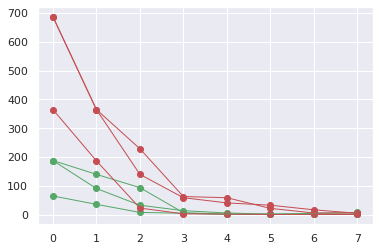

In [ ]:
xarray=np.arange(0,8)
plt.scatter(xarray, V[8], color="g", linewidth=1)
plt.plot(xarray, V[8], color="g", linewidth=1)
plt.scatter(xarray, V[10], color="g", linewidth=1)
plt.plot(xarray, V[10], color="g", linewidth=1)
plt.scatter(xarray, V[13], color="g", linewidth=1)
plt.plot(xarray, V[13], color="g", linewidth=1)
plt.scatter(xarray, V[0], color="r", linewidth=1)
plt.plot(xarray, V[0], color="r", linewidth=1)
plt.scatter(xarray, V[4], color="r", linewidth=1)
plt.plot(xarray, V[4], color="r", linewidth=1)
plt.scatter(xarray, V[6], color="r", linewidth=1)
plt.plot(xarray, V[6], color="r", linewidth=1)

Obesrvemos visualmente como son estos patrones de cadenas en algunos ejemplos.

Las lineas rojas representan noticias falsas mientras que las verdes representan verdaderas.

**Pruebas de algoritmos:**

In [ ]:
y=data['labels']

X_train, X_test, y_train, y_test = train_test_split(V, y, test_size=0.1)
est0 = GaussianNB()
est0.fit(X_train,y_train)
y_pred= est0.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.21      0.30        47
           1       0.39      0.71      0.51        34

    accuracy                           0.42        81
   macro avg       0.45      0.46      0.40        81
weighted avg       0.46      0.42      0.39        81

0.41975308641975306


In [ ]:
y=data['labels']

X_train, X_test, y_train, y_test = train_test_split(V, y, test_size=0.1, random_state=21)
est1 = DecisionTreeClassifier()
est1.fit(X_train,y_train)
y_pred= est1.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.74      0.47        23
           1       0.81      0.45      0.58        58

    accuracy                           0.53        81
   macro avg       0.58      0.59      0.52        81
weighted avg       0.68      0.53      0.55        81

0.5308641975308642


In [ ]:
from tensorflow import keras
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape= X_train[0].shape),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 8)                 0         
                                                                 
 dense_66 (Dense)            (None, 128)               1152      
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 2)                 130       
                                                                 
Total params: 9,538
Trainable params: 9,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
23/23 [==============================] - 0s 2ms/step - loss: 177940.5469 - accuracy: 0.4869
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 137.9251

In [ ]:
est2 = RandomForestClassifier()
est2.fit(X_train,y_train)
y_pred= est2.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.70      0.48        23
           1       0.82      0.53      0.65        58

    accuracy                           0.58        81
   macro avg       0.59      0.62      0.57        81
weighted avg       0.69      0.58      0.60        81

0.5802469135802469


**El más eficaz:**

In [ ]:
est3 = SVC()
est3.fit(X_train,y_train)
y_pred= est3.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34        23
           1       0.74      0.72      0.73        58

    accuracy                           0.62        81
   macro avg       0.54      0.54      0.54        81
weighted avg       0.62      0.62      0.62        81

0.6172839506172839


**¿Podemos mejorarlo aún más?**

In [ ]:
listAcc= []

kernels= ['rbf', 'linear', 'poly', 'sigmoid']
for k in kernels:
  estSVC = SVC(kernel=k)
  estSVC.fit(X_train,y_train)
  y_pred= estSVC.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  listAcc.append(k)
  listAcc.append(acc)

print(listAcc)

['rbf', 0.6172839506172839, 'linear', 0.5308641975308642, 'poly', 0.5432098765432098, 'sigmoid', 0.5185185185185185]


In [ ]:
listAcc= []

gammas= ['scale', 'auto']
for g in gammas:
  estSVC = SVC(kernel='rbf', gamma=g)
  estSVC.fit(X_train,y_train)
  y_pred= estSVC.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  listAcc.append(g)
  listAcc.append(acc)

print(listAcc)

['scale', 0.6172839506172839, 'auto', 0.6666666666666666]


In [ ]:
listAcc= []

stan = [0.1, 0.3, 0.5, 0.7, 1]
for e in stan:
  estSVC = SVC(kernel='rbf', gamma='auto', C=e)
  estSVC.fit(X_train,y_train)
  y_pred= estSVC.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  listAcc.append(e)
  listAcc.append(acc)

print(listAcc)

[0.1, 0.7160493827160493, 0.3, 0.7160493827160493, 0.5, 0.7160493827160493, 0.7, 0.6666666666666666, 1, 0.6666666666666666]


**Algoritmo Definitivo**

In [ ]:
est3 = SVC(kernel='rbf', gamma='auto', C=0.5)
est3.fit(X_train,y_train)
y_pred= est3.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.08        23
           1       0.72      0.98      0.83        58

    accuracy                           0.72        81
   macro avg       0.61      0.51      0.46        81
weighted avg       0.66      0.72      0.62        81

0.7160493827160493


*Referencias:*

https://www.ifj.org/fileadmin/user_upload/Fake_News_-_FIP_AmLat.pdf

https://es.wikipedia.org/wiki/Fake_news

https://www.ifj.org/fileadmin/user_upload/Fake_News_-_FIP_AmLat.pdf


https://www.freepik.com/free-vector/breaking-news-streaming-theme_7523556.htm#query=news&position=23&from_view=search

*DataSet tomado de:*

https://www.kaggle.com/datasets/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war

*Imagenes tomadas de freepik:*


https://www.freepik.com/free-psd/newspaper-scientific-article-inner-double-pages-template_6299360.htm

https://www.freepik.com/free-photo/fake-news-works-coming-out-megaphone_22429302.htm

https://www.freepik.com/free-vector/breaking-news-streaming-theme_7523556.htm

